In [ ]:
#Dataset Link
# Australian monthly gas production
# https://vincentarelbundock.github.io/Rdatasets/datasets.html
## CSV Link
# https://vincentarelbundock.github.io/Rdatasets/csv/forecast/gas.csv

Part 1 - Data Preprocessing

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the training set
dataset_ts = pd.read_csv('gas.csv')
dataset_ts.drop('Unnamed: 0',axis=1,inplace=True)
dataset_ts.head()

,time,value
0,1956.000000,1709
1,1956.083333,1646
2,1956.166667,1794
3,1956.250000,1878
4,1956.333333,2173


In [ ]:
dataset_ts.shape

(476, 2)

In [ ]:
dataset_train = dataset_ts.iloc[:450,:]
dataset_train.shape

(450, 2)

In [ ]:
training_set = dataset_train.iloc[:, 1].values
training_set[:5]

array([1709, 1646, 1794, 1878, 2173])

Feature Scaling

In [ ]:
training_set.shape

(450,)

In [ ]:
# Add extra dim for processing purpose
training_set = training_set.reshape(-1,1)

In [ ]:
training_set[:5]

array([[1709],
       [1646],
       [1794],
       [1878],
       [2173]])

In [ ]:
training_set.shape

(450, 1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [ ]:
training_set_scaled[:5]

array([[0.00103697],
       [0.        ],
       [0.00243605],
       [0.00381868],
       [0.00867433]])

Creating a data structure with timesteps and 1 output

In [ ]:
timesteps=50 # 25 75
trn_size = dataset_train.shape[0]

In [ ]:
X_train = []
y_train = []
for i in range(timesteps, trn_size):
    X_train.append(training_set_scaled[i-timesteps:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)


In [ ]:
X_train.shape

(400, 50)

In [ ]:
X_train[:1]

array([[0.00103697, 0.        , 0.00243605, 0.00381868, 0.00867433,
        0.01111038, 0.01352997, 0.01267406, 0.00885538, 0.00781842,
        0.0052013 , 0.00294631, 0.00172828, 0.00069131, 0.00450999,
        0.00485565, 0.01094578, 0.01041907, 0.01632814, 0.01320078,
        0.01041907, 0.00850973, 0.00485565, 0.00381868, 0.0020904 ,
        0.00069131, 0.002255  , 0.00556342, 0.01060013, 0.01423775,
        0.01754617, 0.0144188 , 0.01145604, 0.00903644, 0.00469105,
        0.00434539, 0.00138263, 0.00069131, 0.00416433, 0.00572802,
        0.01145604, 0.01492906, 0.01754617, 0.01614708, 0.01180169,
        0.01094578, 0.00625473, 0.00434539, 0.00190934, 0.00278171]])

In [ ]:
y_train[:1]

array([0.00590908])

In [ ]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
X_train.shape

(400, 50, 1)

Part 2 - Building the RNN / LSTM

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
(X_train.shape[1],X_train.shape[2])

(50, 1)

Initialising the RNN

In [ ]:
model = keras.Sequential()

# Adding LSTM layers
model.add(keras.layers.LSTM(units=150,return_sequences = True, 
                            input_shape= (X_train.shape[1],X_train.shape[2]) ))
model.add(keras.layers.LSTM(units=80,return_sequences = True ))
model.add(keras.layers.LSTM(units=50 ))

# Adding the output layer
model.add(keras.layers.Dense(1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50, 2)             32        
_________________________________________________________________
lstm_1 (LSTM)                (None, 1)                 16        
_________________________________________________________________
dense (Dense)                (None, 1)                 2         
Total params: 50
Trainable params: 50
Non-trainable params: 0
_________________________________________________________________


Fitting the RNN to the Training set

In [ ]:
history = model.fit( X_train, y_train, validation_split=0.3,epochs = 50, batch_size = 25)

Epoch 1/50
12/12 [==============================] - 2s 138ms/step - loss: 0.0023 - val_loss: 0.0141
Epoch 2/50
12/12 [==============================] - 2s 133ms/step - loss: 0.0024 - val_loss: 0.0177
Epoch 3/50
12/12 [==============================] - 2s 134ms/step - loss: 0.0027 - val_loss: 0.0137
Epoch 4/50
12/12 [==============================] - 2s 131ms/step - loss: 0.0039 - val_loss: 0.0237
Epoch 5/50
12/12 [==============================] - 2s 133ms/step - loss: 0.0030 - val_loss: 0.0224
Epoch 6/50
12/12 [==============================] - 2s 132ms/step - loss: 0.0031 - val_loss: 0.0240
Epoch 7/50
12/12 [==============================] - 2s 134ms/step - loss: 0.0033 - val_loss: 0.0147
Epoch 8/50
12/12 [==============================] - 2s 133ms/step - loss: 0.0029 - val_loss: 0.0141
Epoch 9/50
12/12 [==============================] - 2s 130ms/step - loss: 0.0023 - val_loss: 0.0146
Epoch 10/50
12/12 [==============================] - 2s 132ms/step - loss: 0.0022 - val_loss: 0.0150

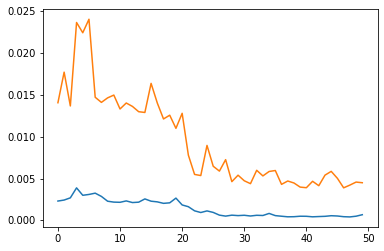

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

Part 3 - Making the predictions and visualising the results

In [ ]:
dataset_test = dataset_ts.iloc[450:,:]
dataset_test.shape

(26, 2)

In [ ]:
test_set = dataset_test.iloc[:, 1].values
test_set

array([56807, 54634, 51367, 48073, 46251, 43736, 39975, 40478, 46895,
       46147, 55011, 57799, 62450, 63896, 57784, 53231, 50354, 38410,
       41600, 41471, 46287, 49013, 56624, 61739, 66600, 60054])

In [ ]:
dataset_total = pd.concat((dataset_train['value'], dataset_test['value']), axis = 0)
dataset_total

0       1709
1       1646
2       1794
3       1878
4       2173
       ...  
471    49013
472    56624
473    61739
474    66600
475    60054
Name: value, Length: 476, dtype: int64

In [ ]:
inputs = dataset_total[len(dataset_total) - len(dataset_test) - timesteps:].values
inputs = inputs.reshape(-1,1)
len(inputs)

76

In [ ]:
inputs = sc.transform(inputs)
X_test = []
for i in range(timesteps, len(inputs)):
    X_test.append(inputs[i-timesteps:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_test.shape

(26, 50, 1)

In [ ]:
predicted_values = model.predict(X_test)
predicted_values

array([[0.8631422 ],
       [0.8267899 ],
       [0.7625889 ],
       [0.691171  ],
       [0.6259359 ],
       [0.57302225],
       [0.5332532 ],
       [0.51441616],
       [0.52920276],
       [0.5851324 ],
       [0.67686063],
       [0.7836233 ],
       [0.8730737 ],
       [0.912523  ],
       [0.9040076 ],
       [0.8676753 ],
       [0.8233494 ],
       [0.78600436],
       [0.76196676],
       [0.7576411 ],
       [0.7751742 ],
       [0.80895776],
       [0.84454626],
       [0.8638218 ],
       [0.85726196],
       [0.82515997]], dtype=float32)

In [ ]:
predicted_values.shape

(26, 1)

In [ ]:
predicted_values = sc.inverse_transform(predicted_values)
predicted_values

array([[54085.34 ],
       [51876.797],
       [47976.33 ],
       [43637.402],
       [39674.11 ],
       [36459.395],
       [34043.266],
       [32898.84 ],
       [33797.184],
       [37195.137],
       [42767.992],
       [49254.25 ],
       [54688.72 ],
       [57085.42 ],
       [56568.08 ],
       [54360.746],
       [51667.77 ],
       [49398.91 ],
       [47938.53 ],
       [47675.727],
       [48740.934],
       [50793.42 ],
       [52955.562],
       [54126.63 ],
       [53728.094],
       [51777.77 ]], dtype=float32)

Visualising the results

In [ ]:
%matplotlib inline

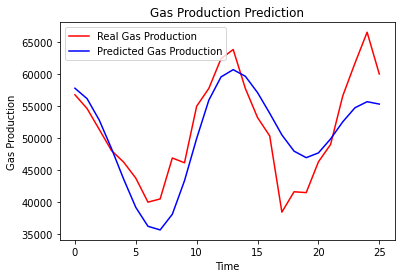

In [ ]:
plt.plot(test_set, color = 'red', label = 'Real Gas Production')
plt.plot(predicted_values, color = 'blue', label = 'Predicted Gas Production')
plt.title('Gas Production Prediction')
plt.xlabel('Time')
plt.ylabel('Gas Production')
plt.legend()
plt.show()

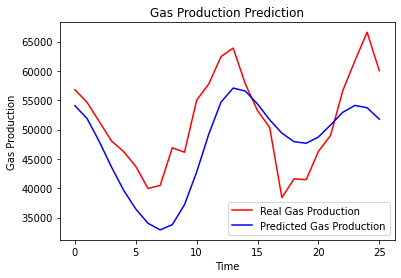

In [ ]:
plt.plot(test_set, color = 'red', label = 'Real Gas Production')
plt.plot(predicted_values, color = 'blue', label = 'Predicted Gas Production')
plt.title('Gas Production Prediction')
plt.xlabel('Time')
plt.ylabel('Gas Production')
plt.legend()
plt.show()